#### Problem statement

1.Develop a predictive model to estimate product sales at each store based on the provided dataset.

2.Identify and understand the key properties of products and stores that significantly influence sales.

3.Address and impute missing values in the dataset caused by technical glitches.

#### Hypothesis

Store Size Impact:
Hypothesis: Larger stores tend to have higher sales due to a broader product range and increased customer attraction.

Location Influence:
Hypothesis: Stores in economically thriving or densely populated areas experience higher sales.

Promotion Boost:
Hypothesis: Products with ongoing promotions witness increased sales compared to non-promotional items.

Seasonal Sales Patterns:
Hypothesis: Certain products or categories exhibit seasonal sales peaks.

Product Visibility Matters:
Hypothesis: Strategically placed products with higher visibility lead to increased sales.

Brand Reputation Impact:
Hypothesis: Products tied to well-established brands achieve greater sales.

Store Layout Significance:
Hypothesis: Stores with efficient layouts observe higher sales.

Demographics and Sales:
Hypothesis: Products tailored to local demographics show varying sales patterns.

Product Quality Effect:
Hypothesis: Higher quality products achieve greater sales.


In [333]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from category_encoders import CountEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [334]:
df=pd.read_csv("Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


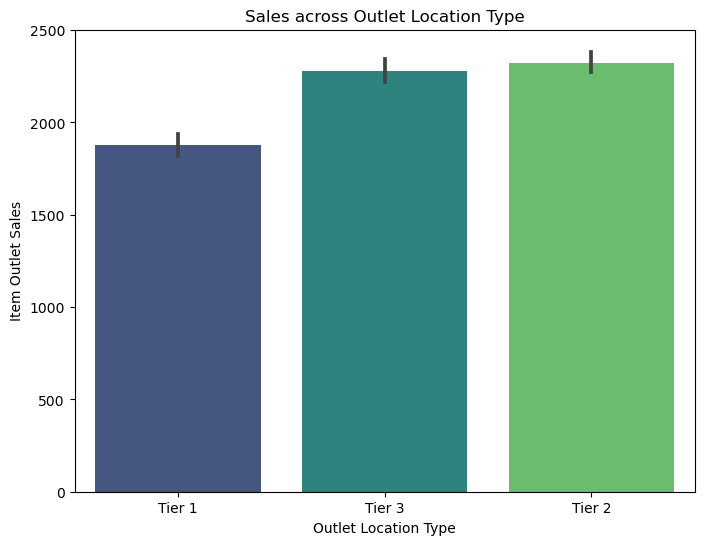

In [335]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df, palette='viridis')
plt.xlabel('Outlet Location Type')
plt.ylabel('Item Outlet Sales')
plt.title('Sales across Outlet Location Type')
plt.show()

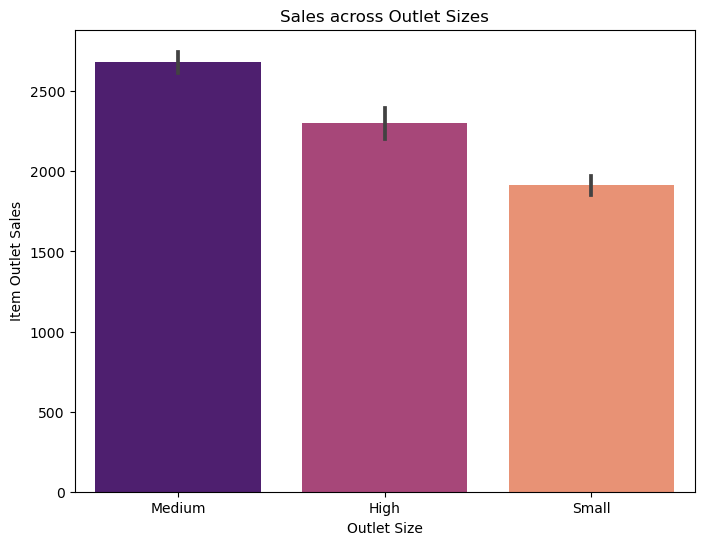

In [336]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df, palette='magma')
plt.xlabel('Outlet Size')
plt.ylabel('Item Outlet Sales')
plt.title('Sales across Outlet Sizes')
plt.show()

Text(0.5, 1.0, 'Item Outlet Sales across Item Visibilty')

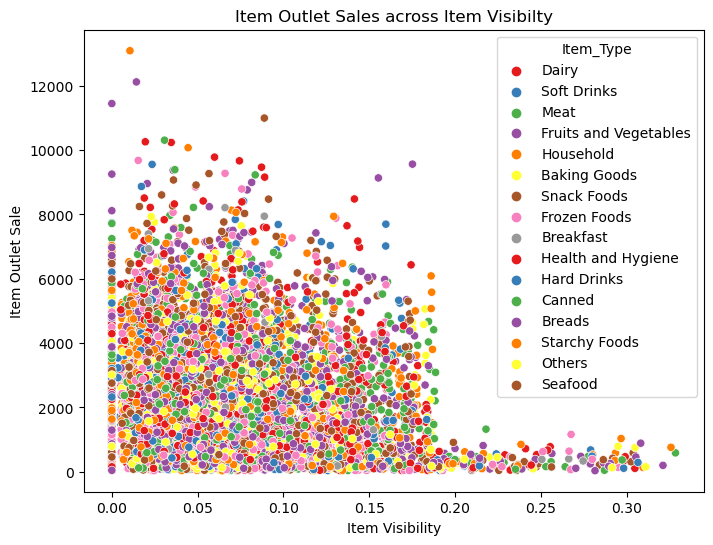

In [337]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue="Item_Type",data=df,palette='Set1')
plt.xlabel("Item Visibility")
plt.ylabel("Item Outlet Sale")
plt.title("Item Outlet Sales across Item Visibilty")

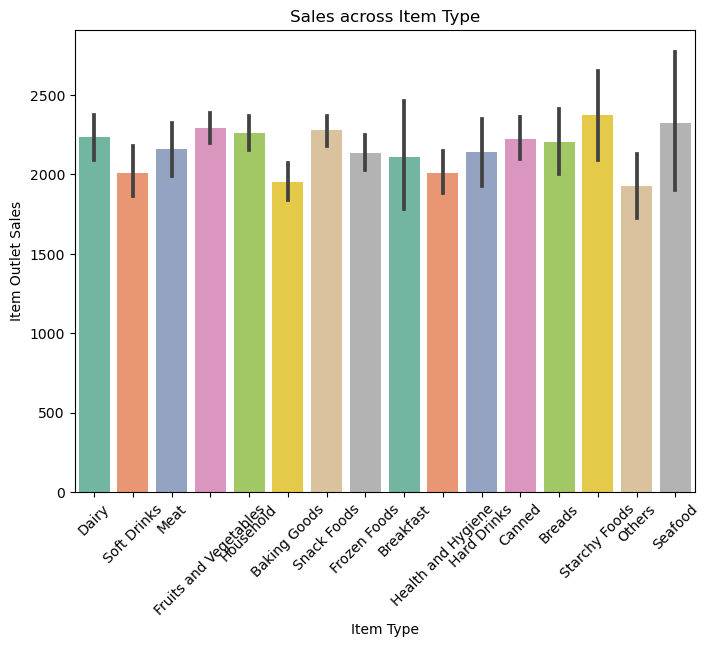

In [338]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=df, palette='Set2')
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales')
plt.title('Sales across Item Type')
plt.xticks(rotation=45)
plt.show()

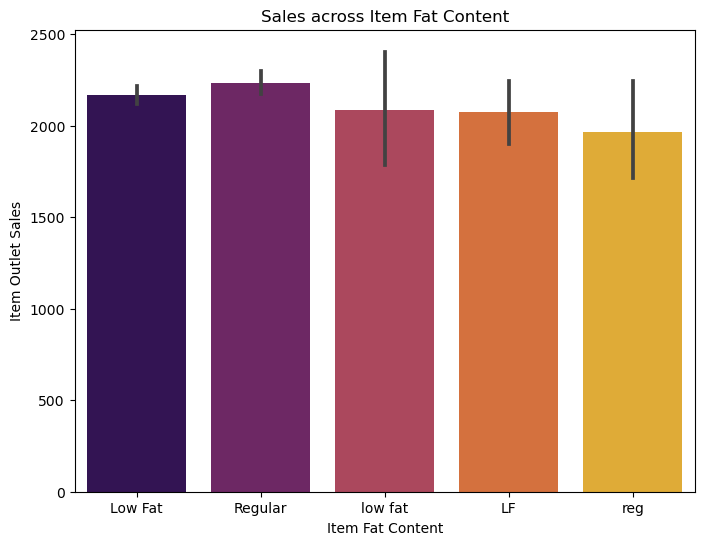

In [339]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df, palette='inferno')
plt.xlabel('Item Fat Content')
plt.ylabel('Item Outlet Sales')
plt.title('Sales across Item Fat Content')
plt.show()

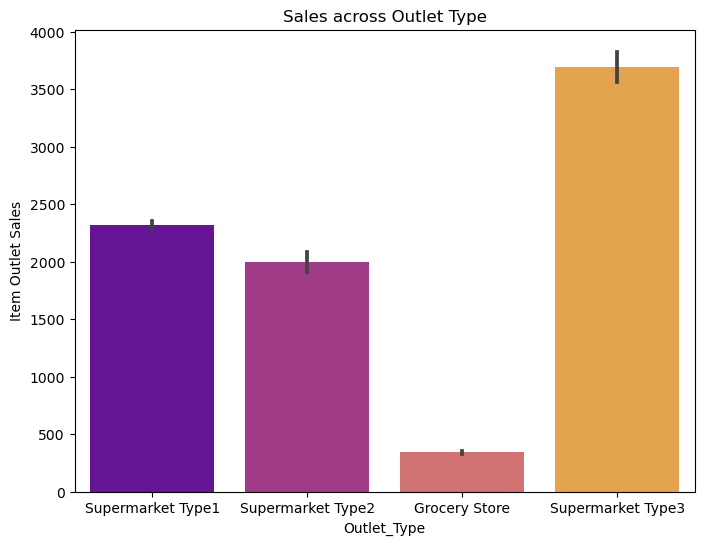

In [340]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df, palette='plasma')
plt.xlabel('Outlet_Type')
plt.ylabel('Item Outlet Sales')
plt.title('Sales across Outlet Type')
plt.show()

In [341]:
df.shape

(8523, 12)

In [342]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [344]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [345]:
#replacing the null values with mean in item weight
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)
#replacing the null values with mode in outlet size (df['Outlet_Size'].mode() = Medium)
df['Outlet_Size'].fillna("Medium",inplace=True)

In [346]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [347]:
#no duplicate entries found
df.duplicated().sum()

0

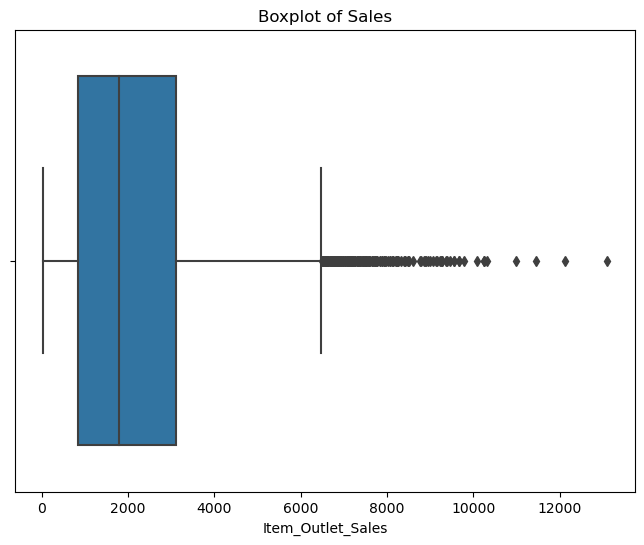

In [348]:
#checking for outliers 
plt.figure(figsize=(8, 6))
sns.boxplot(x="Item_Outlet_Sales",data=df)
plt.title("Boxplot of Sales")
plt.show()

In [349]:
def rem_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    IQR=q3-q1
    lower_range=q1 - (1.5 * IQR)
    upper_range=q3 + (1.5 * IQR)
    return lower_range,upper_range

In [350]:
lower,upper=rem_outlier(df['Item_Outlet_Sales'])

In [351]:
df['Item_Outlet_Sales']=np.where(df['Item_Outlet_Sales']>upper,upper,df['Item_Outlet_Sales'])
df['Item_Outlet_Sales']=np.where(df['Item_Outlet_Sales']<lower,lower,df['Item_Outlet_Sales'])

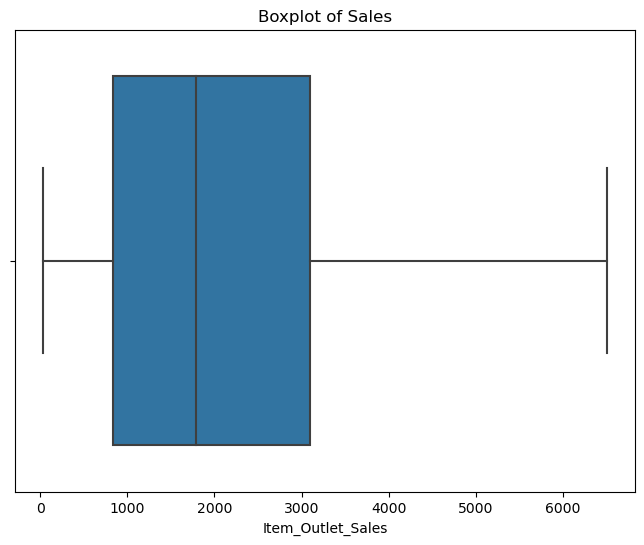

In [352]:
#checking for outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x="Item_Outlet_Sales",data=df)
plt.title("Boxplot of Sales")
plt.show()

The outliers has been removed

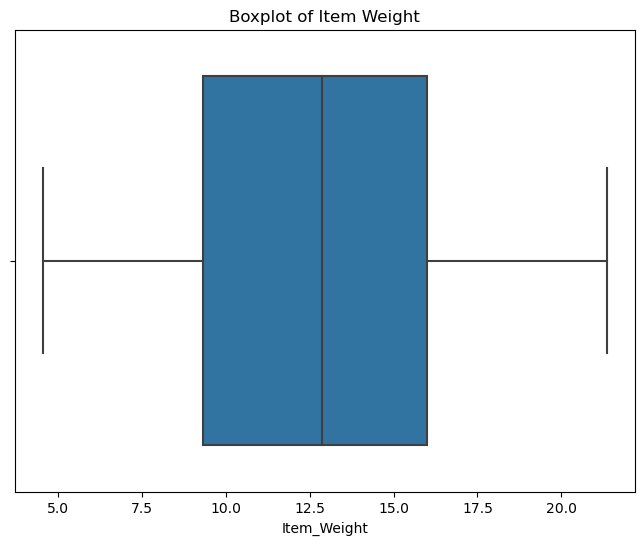

In [353]:
#checking for outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x="Item_Weight",data=df)
plt.title("Boxplot of Item Weight")
plt.show()

no outliers present

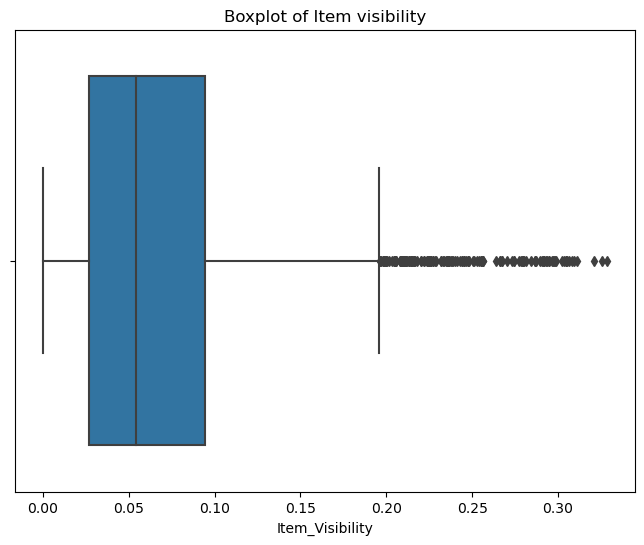

In [354]:
#checking for outliers 
plt.figure(figsize=(8, 6))
sns.boxplot(x="Item_Visibility",data=df)
plt.title("Boxplot of Item visibility")
plt.show()

In [355]:
lower,upper=rem_outlier(df['Item_Visibility'])

In [356]:
df['Item_Visibility']=np.where(df['Item_Visibility']>upper,upper,df['Item_Visibility'])
df['Item_Visibility']=np.where(df['Item_Visibility']<lower,lower,df['Item_Visibility'])

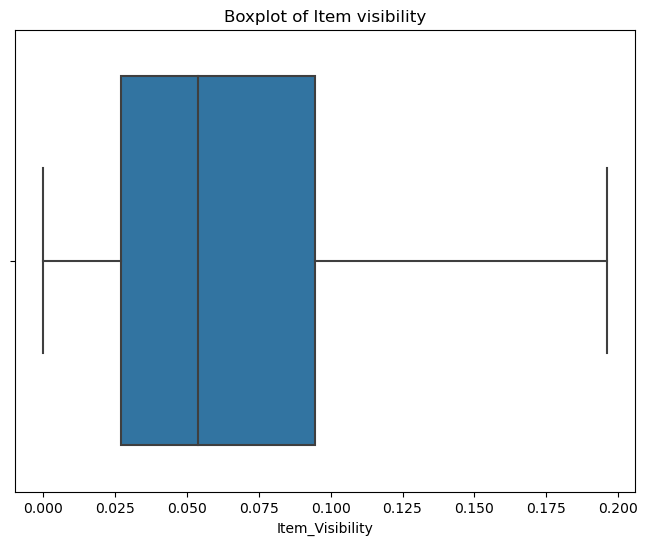

In [357]:
#checking for outliers 
plt.figure(figsize=(8, 6))
sns.boxplot(x="Item_Visibility",data=df)
plt.title("Boxplot of Item visibility")
plt.show()

The outliers have been handled

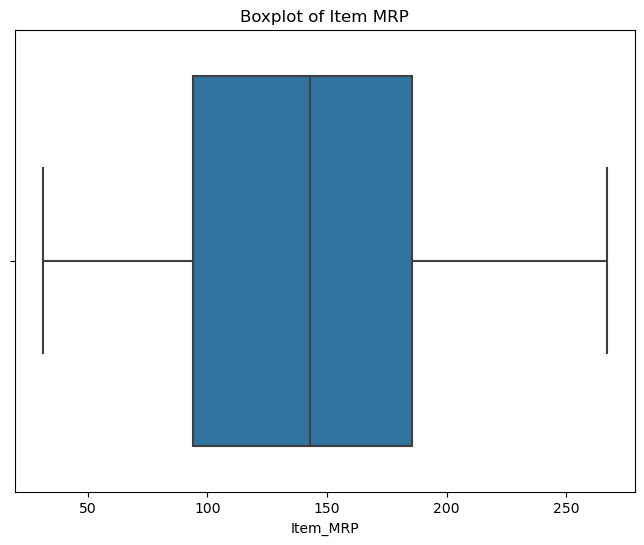

In [358]:
#checking for outliers 
plt.figure(figsize=(8, 6))
sns.boxplot(x="Item_MRP",data=df)
plt.title("Boxplot of Item MRP")
plt.show()

no outliers present

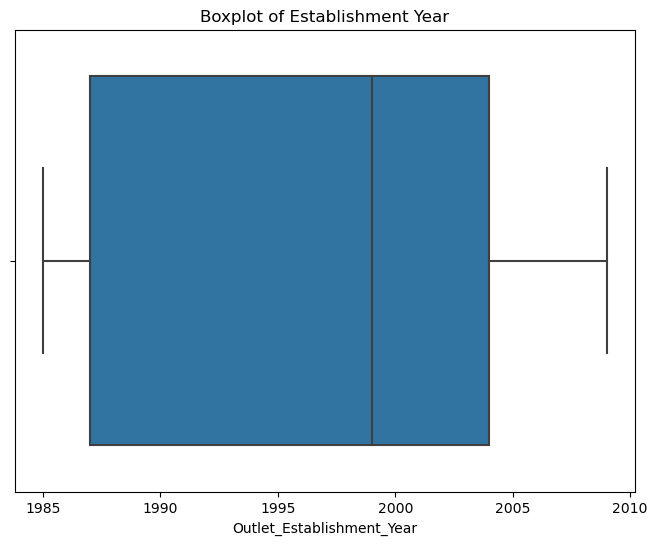

In [359]:
#checking for outliers 
plt.figure(figsize=(8, 6))
sns.boxplot(x="Outlet_Establishment_Year",data=df)
plt.title("Boxplot of Establishment Year")
plt.show()

no outliers present

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5024\604714037.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


<Axes: >

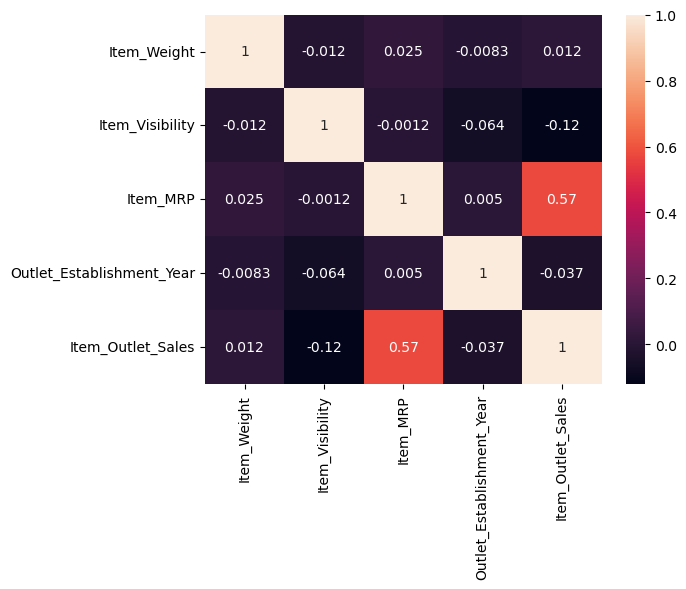

In [360]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)

In [361]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [362]:
#encoding
le = LabelEncoder()
data=df
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type','Outlet_Type']
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [363]:
data['Item_Code'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data[['Item_Identifier', 'Item_Code']].head()

,Item_Identifier,Item_Code
0,FDA15,FD
1,DRC01,DR
2,FDN15,FD
3,FDX07,FD
4,NCD19,NC


In [364]:
data['Item_Code']=le.fit_transform(data['Item_Code'])
data['Item_Identifier']=le.fit_transform(data['Item_Identifier'])

In [365]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet,Item_Code
0,156,9.30,1,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,9,1
1,8,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,3,0
2,662,17.50,1,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,9,1
3,1121,19.20,2,0.000000,6,182.0950,OUT010,1998,1,2,0,732.3800,0,1
4,1297,8.93,1,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052,1,2


In [366]:
features=df.drop(["Item_Outlet_Sales","Outlet_Identifier"],axis=1)
x=features.iloc[:,0:].values
y=df.iloc[:,9:10].values

In [367]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)

In [179]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [180]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

1.0

In [232]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train, y_train)
y_pred = ridge_model.predict(x_test)
r2_score(y_test, y_pred)

0.9999999987565399

In [227]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.2)
lasso_model.fit(x_train, y_train)
y_pred_lasso = lasso_model.predict(x_test)
r2_score(y_test, y_pred_lasso)

0.9384802641680104

In [192]:
test_data=pd.read_csv("Test.csv")

In [193]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [194]:
df=test_data
df.shape

(5681, 11)

In [195]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [196]:
#replacing the null values with mean in item weight
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)
#replacing the null values with mode in outlet size (df['Outlet_Size'].mode() = Medium)
df['Outlet_Size'].fillna("Medium",inplace=True)

In [197]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [198]:
df.duplicated().sum()

0

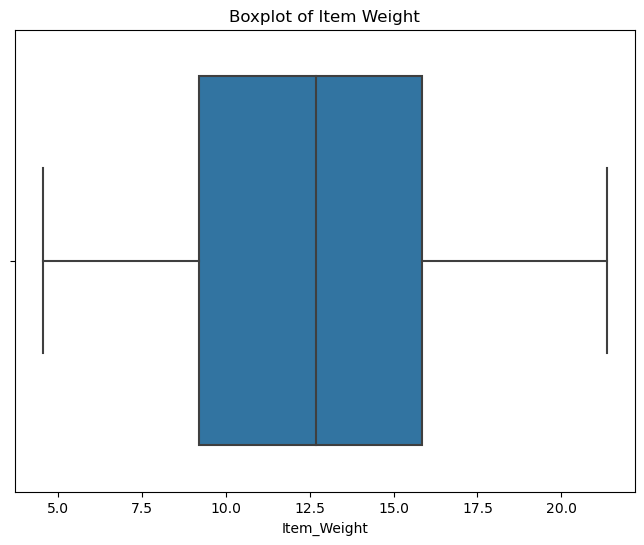

In [199]:
#checking for outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x="Item_Weight",data=df)
plt.title("Boxplot of Item Weight")
plt.show()

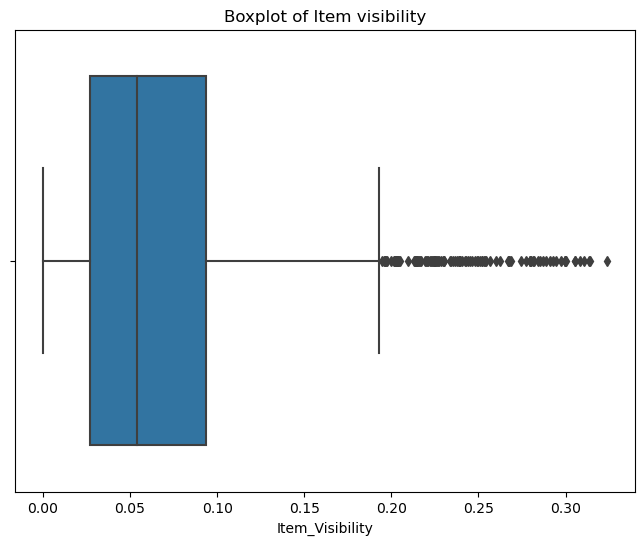

In [200]:
#checking for outliers 
plt.figure(figsize=(8, 6))
sns.boxplot(x="Item_Visibility",data=df)
plt.title("Boxplot of Item visibility")
plt.show()

In [201]:
lower,upper=rem_outlier(df['Item_Visibility'])
df['Item_Visibility']=np.where(df['Item_Visibility']>upper,upper,df['Item_Visibility'])
df['Item_Visibility']=np.where(df['Item_Visibility']<lower,lower,df['Item_Visibility'])

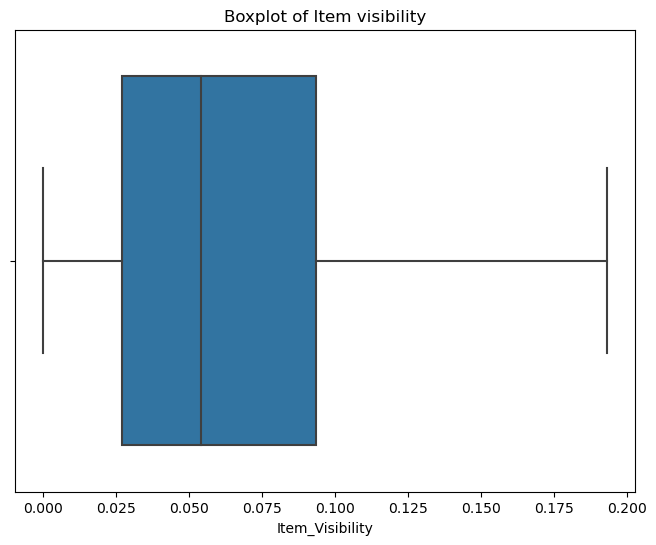

In [202]:
#checking for outliers 
plt.figure(figsize=(8, 6))
sns.boxplot(x="Item_Visibility",data=df)
plt.title("Boxplot of Item visibility")
plt.show()

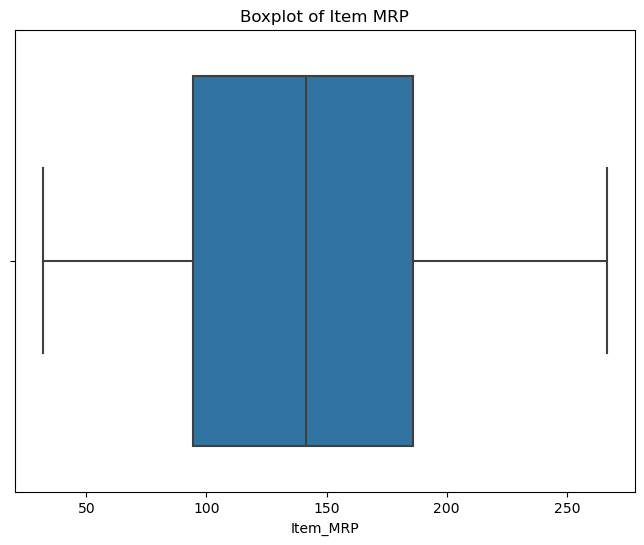

In [203]:
#checking for outliers 
plt.figure(figsize=(8, 6))
sns.boxplot(x="Item_MRP",data=df)
plt.title("Boxplot of Item MRP")
plt.show()

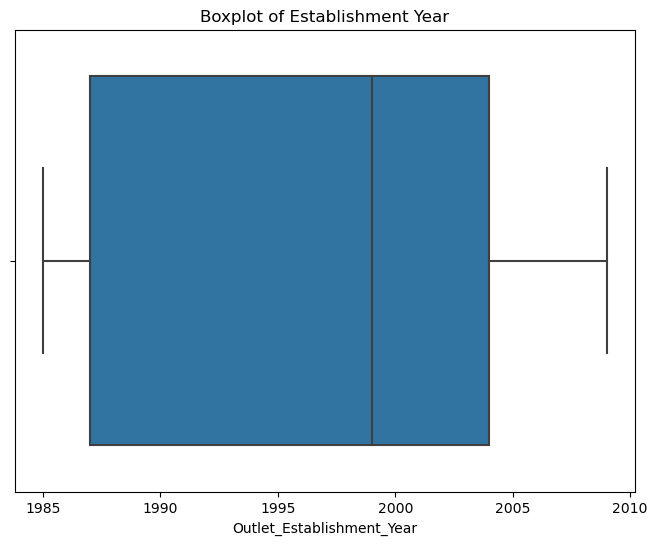

In [204]:
#checking for outliers 
plt.figure(figsize=(8, 6))
sns.boxplot(x="Outlet_Establishment_Year",data=df)
plt.title("Boxplot of Establishment Year")
plt.show()

In [205]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [206]:
#encoding
le = LabelEncoder()
data=df
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type','Outlet_Type']
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [207]:
data['Item_Code'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data[['Item_Identifier', 'Item_Code']].head()
data['Item_Code']=le.fit_transform(data['Item_Code'])
data['Item_Identifier']=le.fit_transform(data['Item_Identifier'])

In [208]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet,Item_Code
0,1103,20.750000,1,0.007565,13,107.8622,OUT049,1999,1,0,1,9,1
1,1067,8.300000,4,0.038428,4,87.3198,OUT017,2007,1,1,1,2,1
2,1406,14.600000,1,0.099575,11,241.7538,OUT010,1998,1,2,0,0,2
3,809,7.315000,1,0.015388,13,155.0340,OUT017,2007,1,1,1,2,1
4,1184,12.695633,2,0.118599,4,234.2300,OUT027,1985,1,2,3,5,1


In [209]:
df.drop("Outlet_Identifier",axis=1,inplace=True)

In [210]:
x=df.iloc[:,0:].values

In [233]:
#linear regression
y_pred=model.predict(x)
#ridge regression
y_pred_ridge=ridge_model.predict(x)
#lasso regression
y_pred_lasso=lasso_model.predict(x)